In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
data = pd.read_csv("data/nhanes_2015_2016.csv")
data.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


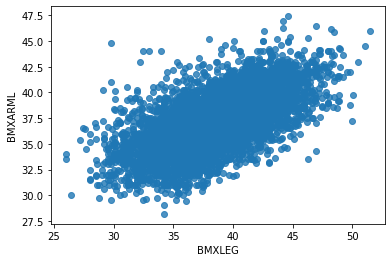

In [48]:
# scatterplot of Y - BMXARML  (arm length) against X - BMXLEG (leg length)
sns.regplot(x="BMXLEG", y="BMXARML",  data=data, fit_reg =False)

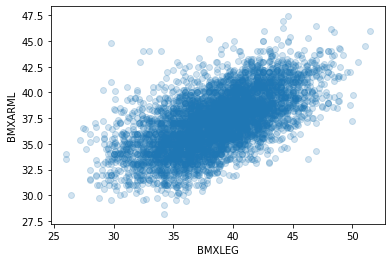

In [49]:
# deixando os pontos transparentes
sns.regplot(x="BMXLEG", y="BMXARML", data=data, fit_reg =False, scatter_kws={"alpha": 0.2})

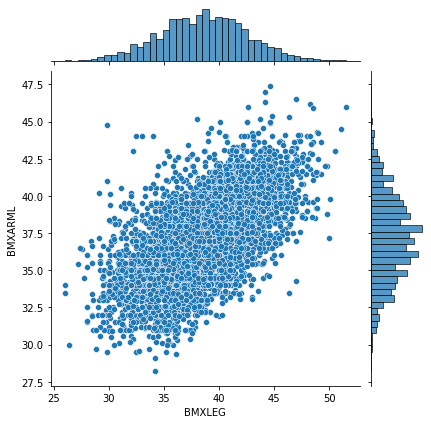

In [50]:
# scatterplot entre tamanho do braço (BMXARML) no eixo y e tamanho da perna (BMXLEG) no eixo y
sns.jointplot(x="BMXLEG", y="BMXARML", data=data)

In [51]:
# Relação entre tamanhã do braço e da perna dividido por gênero
print(data.RIAGENDR)

0       1
1       1
2       1
3       2
4       2
       ..
5730    2
5731    1
5732    2
5733    1
5734    2
Name: RIAGENDR, Length: 5735, dtype: int64


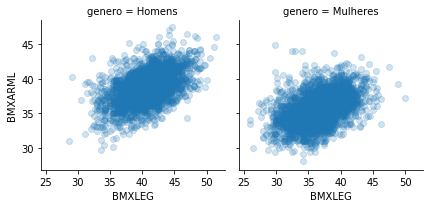

In [52]:
data['genero'] = data.RIAGENDR.replace({1:"Homens", 2: "Mulheres"})
sns.FacetGrid(data, col="genero").map(plt.scatter,"BMXLEG", "BMXARML", alpha= 0.2).add_legend()

In [53]:
# Correlação
print(data.loc[data.genero=="Mulheres", ["BMXLEG", "BMXARML"]].dropna().corr())
print(data.loc[data.genero=="Homens", ["BMXLEG", "BMXARML"]].dropna().corr())

           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000


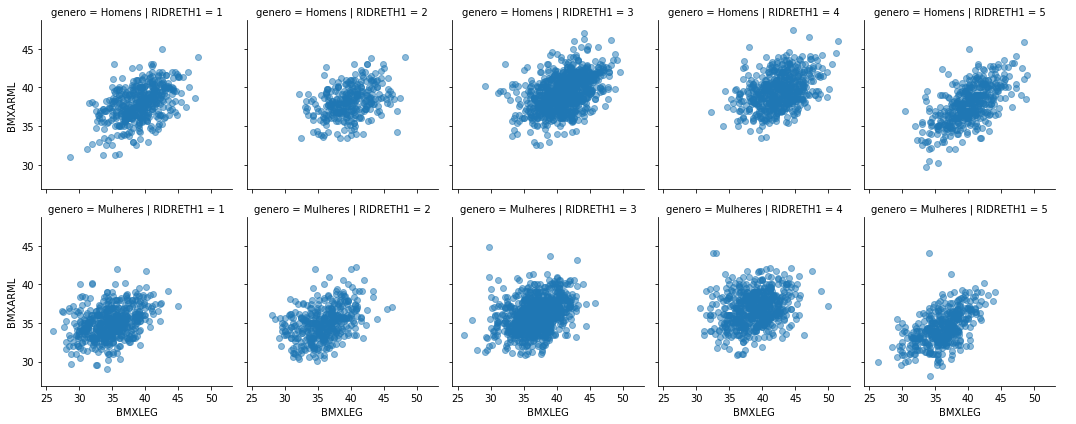

In [54]:
sns.FacetGrid(data, col="RIDRETH1",  row="genero").map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.5).add_legend()

In [55]:
# tabela de contigência entre estado civil (DMDMARTL) e nível de escolaridade (DMDEDUC2)

data['DMDEDUC2x'] = data.DMDEDUC2.replace({
     1: "<9",
     2: "9-11",
     3: "HS/GED",
     4: "Some college/AA",
     5: "College",
     7: "Refused",
     9: "Don't know"   
})

data["DMDMARTLx"] = data.DMDMARTL.replace({
    1: "Married", 
    2: "Widowed", 
    3: "Divorced", 
    4: "Separated", 
    5: "Never married",
    6: "Living w/partner", 77: "Refused"
})

db = data.loc[(data.DMDEDUC2x != "Don't know") & (data.DMDMARTLx != "Refused"), :]
x = pd.crosstab(db.DMDEDUC2x, db.DMDMARTLx)
x

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


In [56]:
# normalizando a tabela de contiência pela linhas
x.apply(lambda z: z/z.sum(), axis=1)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some college/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708


In [57]:
# normalizando a tabela de contiência pela colunas
x.apply(lambda z: z/z.sum(), axis=0)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.107266,0.151803,0.109712,0.116534,0.209677,0.101523
<9,0.089965,0.125237,0.122662,0.064741,0.231183,0.223350
College,0.207612,0.161290,0.297482,0.251992,0.118280,0.149746
HS/GED,0.219723,0.252372,0.197842,0.236056,0.215054,0.251269
Some college/AA,0.375433,0.309298,0.272302,0.330677,0.225806,0.274112


In [58]:
# Agrupando pessoas por sexo (genero), nível educacional (DMDEDUC2x) e estado cívil (DMDMARTLx):
grupos = db.groupby(["genero","DMDEDUC2x", "DMDMARTLx"]).size().unstack()
grupos

DMDMARTLx                 Divorced  Living w/partner  Married  Never married  \
genero   DMDEDUC2x                                                             
Homens   9-11                   29                44      185             67   
         <9                     20                34      193             27   
         College                41                45      413            122   
         HS/GED                 56                69      309            127   
         Some college/AA        82                73      377            141   
Mulheres 9-11                   33                36      120             50   
         <9                     32                32      148             38   
         College                79                40      414            131   
         HS/GED                 71                64      241            110   
         Some college/AA       135                90      380            191   

DMDMARTLx                 Separated  Widowed  
genero   DMDEDUC2x                            
Homens   9-11                    17       10  
         <9                      12       20  
         College                 10       18  
         HS/GED                  16       26  
         Some college/AA         13       25  
Mulheres 9-11                    22       30  
         <9                      31       68  
         College                 12       41  
         HS/GED                  24       73  
         Some college/AA         29       83

In [59]:
# proporções
grupos.apply(lambda x: x/x.sum(),axis=1)

DMDMARTLx                 Divorced  Living w/partner   Married  Never married  \
genero   DMDEDUC2x                                                              
Homens   9-11             0.082386          0.125000  0.525568       0.190341   
         <9               0.065359          0.111111  0.630719       0.088235   
         College          0.063174          0.069337  0.636364       0.187982   
         HS/GED           0.092869          0.114428  0.512438       0.210614   
         Some college/AA  0.115331          0.102672  0.530239       0.198312   
Mulheres 9-11             0.113402          0.123711  0.412371       0.171821   
         <9               0.091691          0.091691  0.424069       0.108883   
         College          0.110181          0.055788  0.577406       0.182706   
         HS/GED           0.121784          0.109777  0.413379       0.188679   
         Some college/AA  0.148678          0.099119  0.418502       0.210352   

DMDMARTLx                 Separated   Widowed  
genero   DMDEDUC2x                             
Homens   9-11              0.048295  0.028409  
         <9                0.039216  0.065359  
         College           0.015408  0.027735  
         HS/GED            0.026534  0.043118  
         Some college/AA   0.018284  0.035162  
Mulheres 9-11              0.075601  0.103093  
         <9                0.088825  0.194842  
         College           0.016736  0.057183  
         HS/GED            0.041166  0.125214  
         Some college/AA   0.031938  0.091410

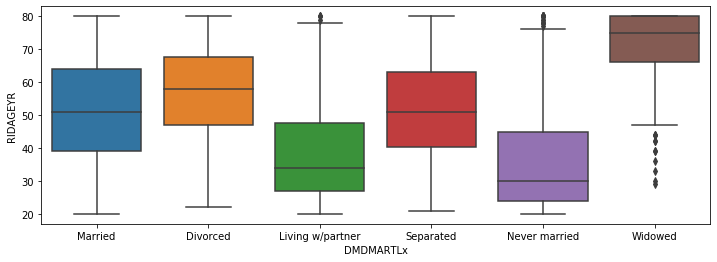

In [60]:
# boxplot da idade por estafo cívil
plt.figure(figsize=(12, 4))
a = sns.boxplot(x=db.DMDMARTLx, y=db.RIDAGEYR)

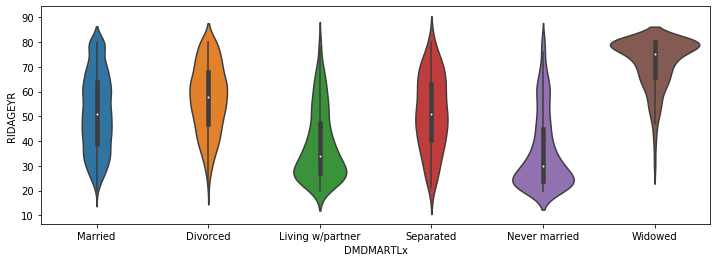

In [62]:
# violinplot - boxplot com a distribuição
plt.figure(figsize=(12, 4))
a = sns.violinplot(x=db.DMDMARTLx, y=db.RIDAGEYR)

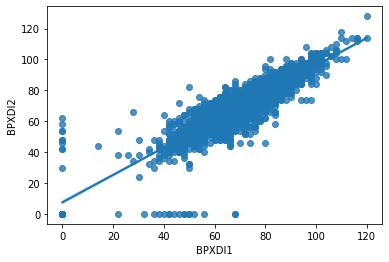

In [68]:
# scatterplot showing the relationship between the first and second measurements 
# of diastolic blood pressure (BPXDI1 and BPXDI2)
x=sns.regplot(x='BPXDI1',y='BPXDI2',data=data)

In [73]:
# obtain the 4x4 matrix of correlation coefficients among the first two systolic (BPXSY1,BPXSY2)
# and the first two diastolic blood pressure measures (BPXDI1,BPXDI2)
data.loc[:,['BPXSY1','BPXSY2','BPXDI1','BPXDI2']].corr()

,BPXSY1,BPXSY2,BPXDI1,BPXDI2
BPXSY1,1.000000,0.962287,0.316531,0.277681
BPXSY2,0.962287,1.000000,0.329843,0.303847
BPXDI1,0.316531,0.329843,1.000000,0.884722
BPXDI2,0.277681,0.303847,0.884722,1.000000


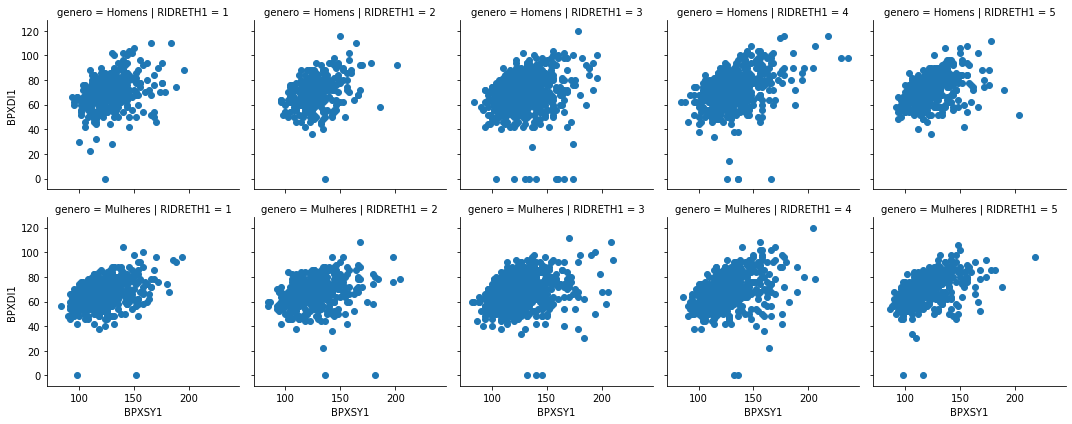

In [80]:
# Construct a grid of scatterplots between the first systolic (BPXSY1) and the first diastolic (BPXDI1) blood 
# pressure measurement. Stratify the plots by gender (rows) and by race/ethnicity groups (columns)
a=sns.FacetGrid(data,row="genero",col="RIDRETH1").map(plt.scatter,"BPXSY1","BPXDI1")

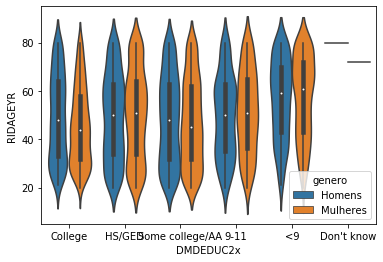

In [96]:
# Use "violin plots" to compare the distributions of ages within groups defined by 
# gender and educational attainment.
x=sns.violinplot(x=data.DMDEDUC2x,y=data.RIDAGEYR,hue=data.genero)

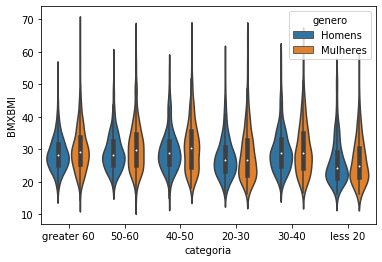

In [141]:
# Use violin plots to compare the distributions of BMI within a series of 10-year age bands. 
# Also stratify these plots by gender.
conditions = [
    (data['RIDAGEYR'] <= 20),
    (data['RIDAGEYR'] > 20) & (data['RIDAGEYR'] <= 30),
    (data['RIDAGEYR'] > 30) & (data['RIDAGEYR'] <= 40),
    (data['RIDAGEYR'] > 40) & (data['RIDAGEYR'] <= 50),
    (data['RIDAGEYR'] > 50) & (data['RIDAGEYR'] <= 60),
    (data['RIDAGEYR'] > 60)
    ]
values = ['less 20', '20-30', '30-40', '40-50','50-60','greater 60']
data['categoria'] = np.select(conditions, values)
x=sns.violinplot(x=data['categoria'],y=data['BMXBMI'],hue=data.genero)

In [146]:
# Construct a frequency table for the joint distribution of ethnicity groups (RIDRETH1) and 
# health-insurance status (HIQ210).
table = pd.crosstab(data.RIDRETH1,data.HIQ210)
table

HIQ210,1.0,2.0,9.0
RIDRETH1,,,
1,93,578,3
2,74,501,0
3,111,1535,2
4,113,926,1
5,65,728,2


In [148]:
# Normalize the results so that the values within each 
# ethnic group are proportions that sum to 1.
table.apply(lambda z: z/z.sum(), axis=1)

HIQ210,1.0,2.0,9.0
RIDRETH1,,,
1,0.137982,0.857567,0.004451
2,0.128696,0.871304,0.000000
3,0.067354,0.931432,0.001214
4,0.108654,0.890385,0.000962
5,0.081761,0.915723,0.002516


In [150]:
df = pd.read_csv('data/Cartwheeldata.csv')
df.columns

Index(['ID', 'Age', 'Gender', 'GenderGroup', 'Glasses', 'GlassesGroup',
       'Height', 'Wingspan', 'CWDistance', 'Complete', 'CompleteGroup',
       'Score'],
      dtype='object')

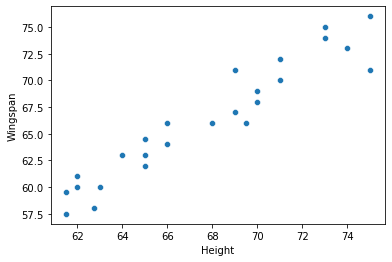

In [156]:
# 1 - Is the relationship between ‘Height’ and ‘Wingspan’ linear?
sns.scatterplot(x='Height',y='Wingspan',data=df)

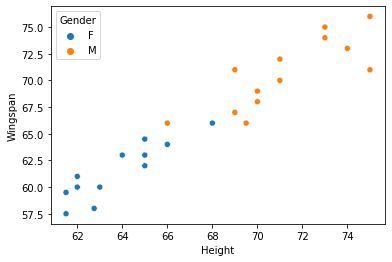

In [158]:
# 2 - Is the relationship between ‘Wingspan’ and ‘Height’ linear for each gender?
sns.scatterplot(x='Height',y='Wingspan',hue = 'Gender',data=df)

In [170]:
# 3 - Is the interquartile range of ‘CWDistance’ similar to ‘Wingspan’? 
q75, q25 = np.percentile(df['CWDistance'], [75 ,25])
iqr = q75 - q25
print(iqr)

q75, q25 = np.percentile(df['Wingspan'], [75 ,25])
iqr = q75 - q25
print(iqr)

22.0
9.0


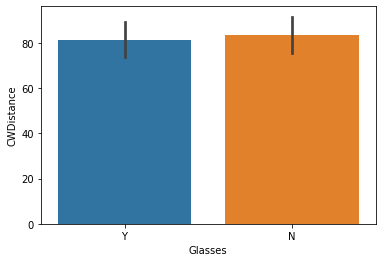

In [172]:
# 4 - Looking at the barplot of ‘Glasses’ and ‘CWDistance’, which glasses condition has a 
# (slightly) larger estimate of cartwheel distance?
sns.barplot(x="Glasses", y="CWDistance", data=df)

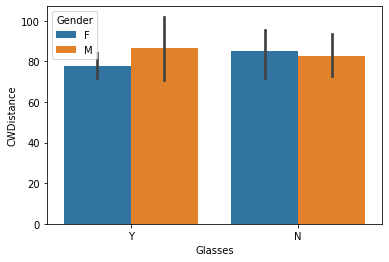

In [175]:
# 5 - Looking at the barplot of ‘Glasses’ and ‘CWDistance’ split by ‘Gender’, which glasses condition has a 
# (slightly) larger estimate of cartwheel distance?

sns.barplot(x="Glasses", y="CWDistance", hue='Gender', data=df)

<function matplotlib.pyplot.show(*args, **kw)>

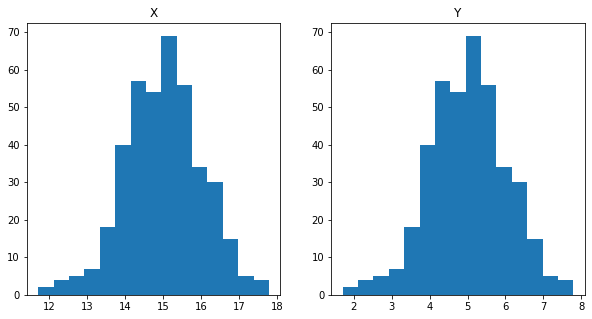

In [3]:
mean = [15,5]
cov = [[1,1],[1,1]]
x,y = np.random.multivariate_normal(mean,cov,400).T

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.hist(x=x, bins=15)
plt.title("X")

plt.subplot(1,2,2)
plt.hist(x=y, bins=15)
plt.title("Y")


plt.show

<function matplotlib.pyplot.show(*args, **kw)>

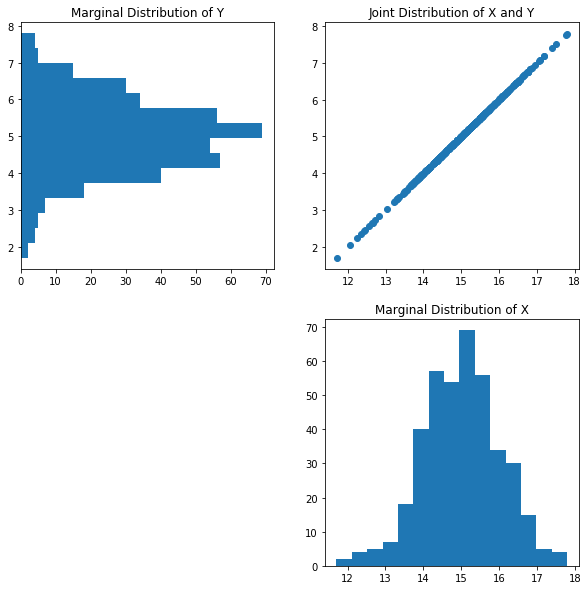

In [4]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,2)
plt.scatter(x=x, y=y)
plt.title("Joint Distribution of X and Y")

plt.subplot(2,2,4)
plt.hist(x=x, bins=15)
plt.title("Marginal Distribution of X")

plt.subplot(2,2,1)
plt.hist(x=y, bins=15, orientation="horizontal")
plt.title("Marginal Distribution of Y")

plt.show